In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from finta import TA
import mplfinance as mpf
from pandas_datareader import data as web
import yfinance as yf
from datetime import datetime

%matplotlib notebook

In [2]:
def get_stock_data(symbol):
    end_date = datetime.now()
    start_date = datetime(2000, 1, 1)
    stock = yf.Ticker(symbol)
    df = stock.history(start=start_date, end=end_date, auto_adjust=True)

    return df

In [3]:
def add_stock_data(symbol, data_set):
    end_date = datetime.now()
    start_date = datetime(2003, 1, 1)
    stock = yf.Ticker(symbol)
    df = stock.history(start=start_date, end=end_date, auto_adjust=True)
    hist_close = df[["Close"]]
    hist_close.rename(columns={"Close": symbol+"_close"}, inplace = True)
    #hist_close.index.names = ['date']
    dataset = pd.merge(data_set, hist_close, on=["Date"])
    return dataset

In [4]:
SYMBOL = "AAPL"

<IPython.core.display.Javascript object>


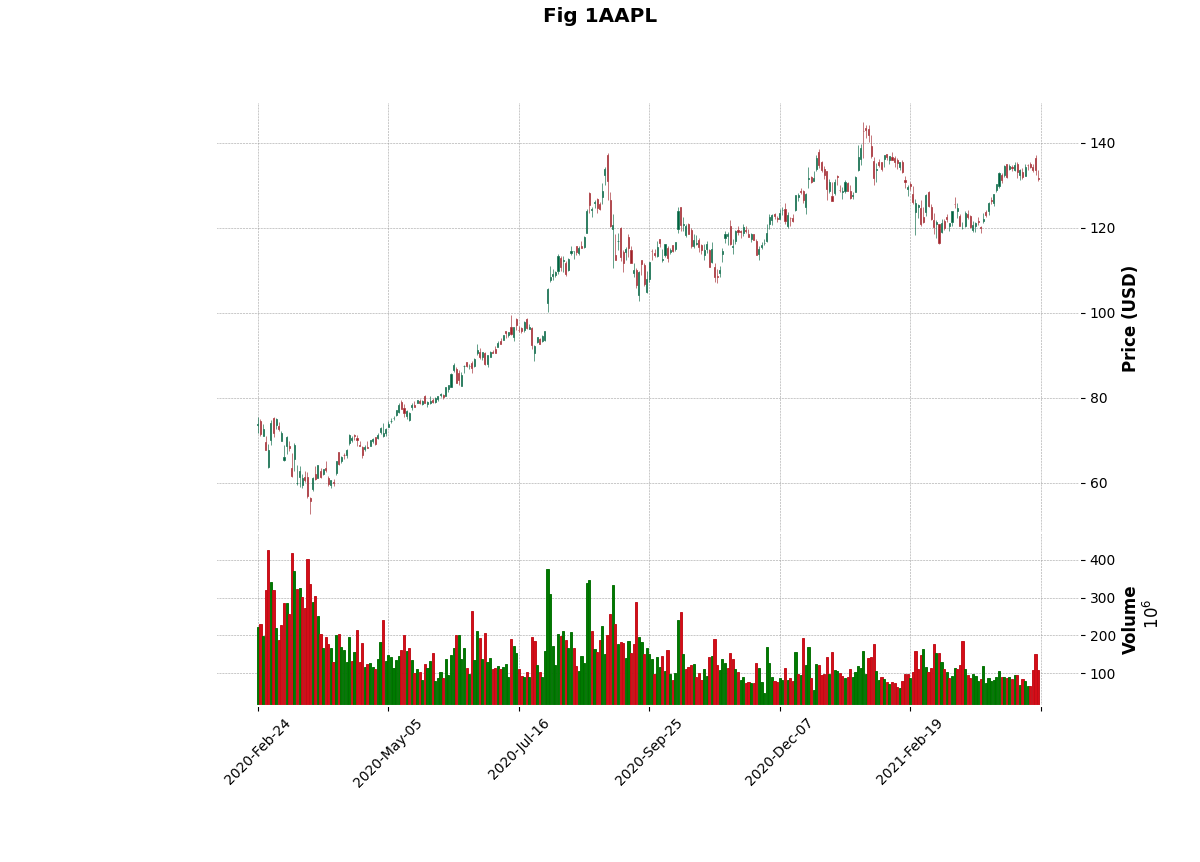

In [5]:

df = get_stock_data(SYMBOL)
mpf.plot(df.tail(300), type='candle', style='charles',
        title="Fig 1"+SYMBOL,
        ylabel='Price (USD)',
        ylabel_lower='Volume',
        volume=True,
        figscale=1.5,
        )

In [6]:
df.dtypes
#df['Datetime'] = pd.to_datetime(df['Date'], format="%Y/%m/%d")

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

<IPython.core.display.Javascript object>


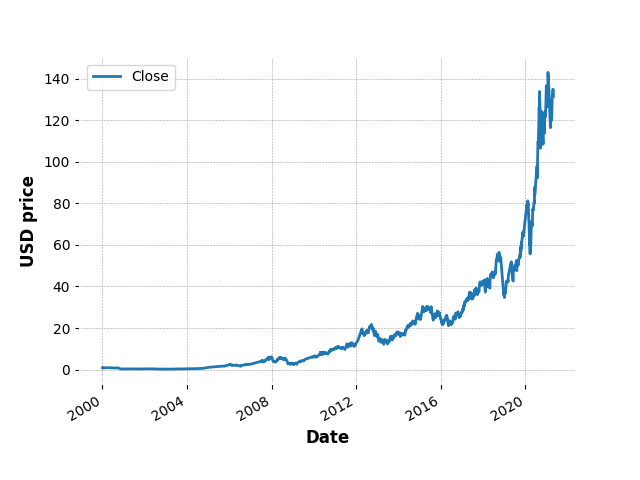

Text(0.5, 0, 'Date')

In [7]:
ax = df.plot(y='Close')

ax.set_ylabel("USD price")
ax.set_xlabel("Date")

In [8]:
import math
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Close'].rolling(window=7).mean()
    dataset['ma21'] = dataset['Close'].rolling(window=21).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['Close'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Close'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['Close']-dataset['26ema'])

    # Create Bollinger Bands
    dataset['21sd'] =  dataset['Close'].rolling(window=21).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['21sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['21sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['Close'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['Close']-1
    dataset['log-momentum'] = np.log(dataset['momentum'])
    
    return dataset

In [9]:
dataset_TI_df = get_technical_indicators(df)

/home/eshahrivar/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<IPython.core.display.Javascript object>


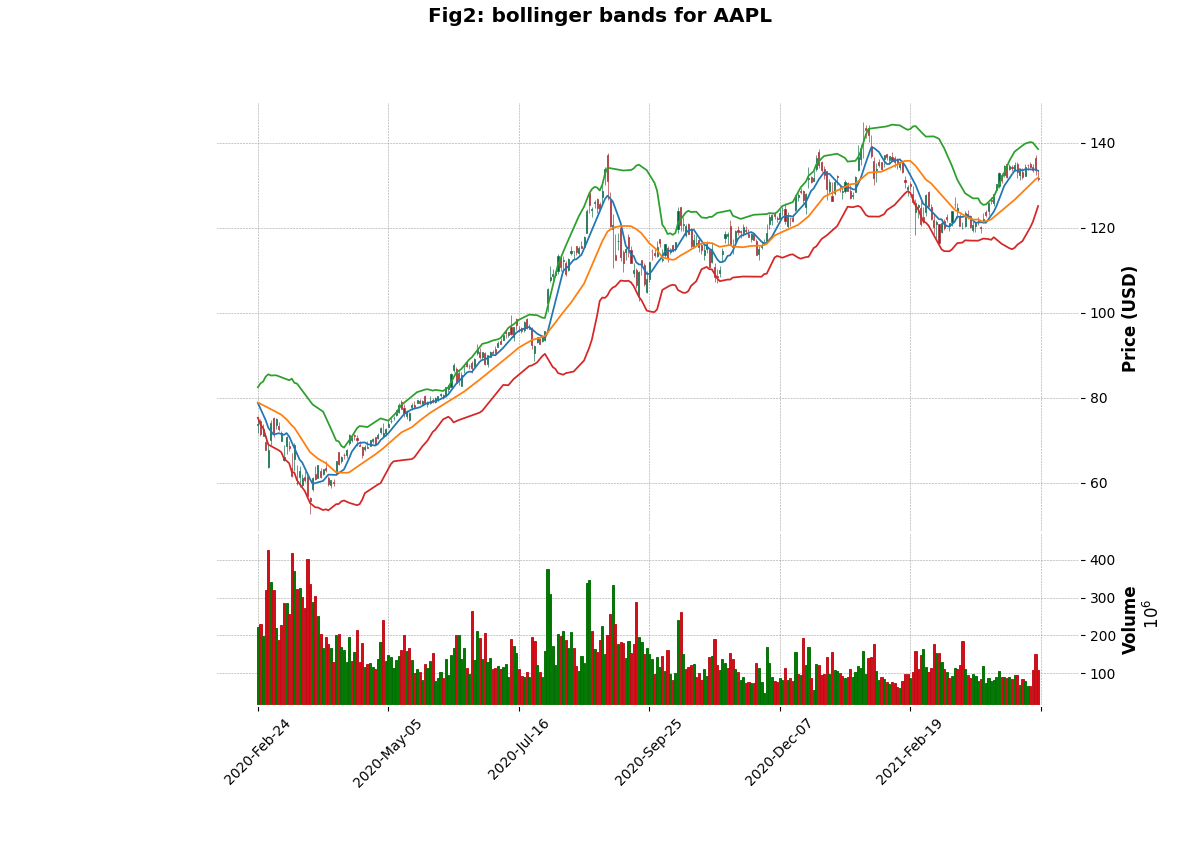

In [10]:
import mplfinance as mpf

bands_plot = pd.concat([dataset_TI_df['ma7'].tail(300), dataset_TI_df['ma21'].tail(300), 
                        dataset_TI_df['upper_band'].tail(300), dataset_TI_df['lower_band'].tail(300)], axis=1)

apd = mpf.make_addplot(bands_plot)

mpf.plot(dataset_TI_df.tail(300), type='candle', style='charles',
        title="Fig2: bollinger bands for "+SYMBOL,
        ylabel='Price (USD)',
        ylabel_lower='Volume',
        volume=True,
        figscale=1.5,
        addplot=apd
        )

In [11]:
import matplotlib.pyplot as plt

def plot_technical_indicators(dataset, last_days):
  
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)

    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    print(xmacd_)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['Close'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Fig3: Technical indicators for ' + SYMBOL+' - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot
    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
    plt.plot(dataset['log-momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


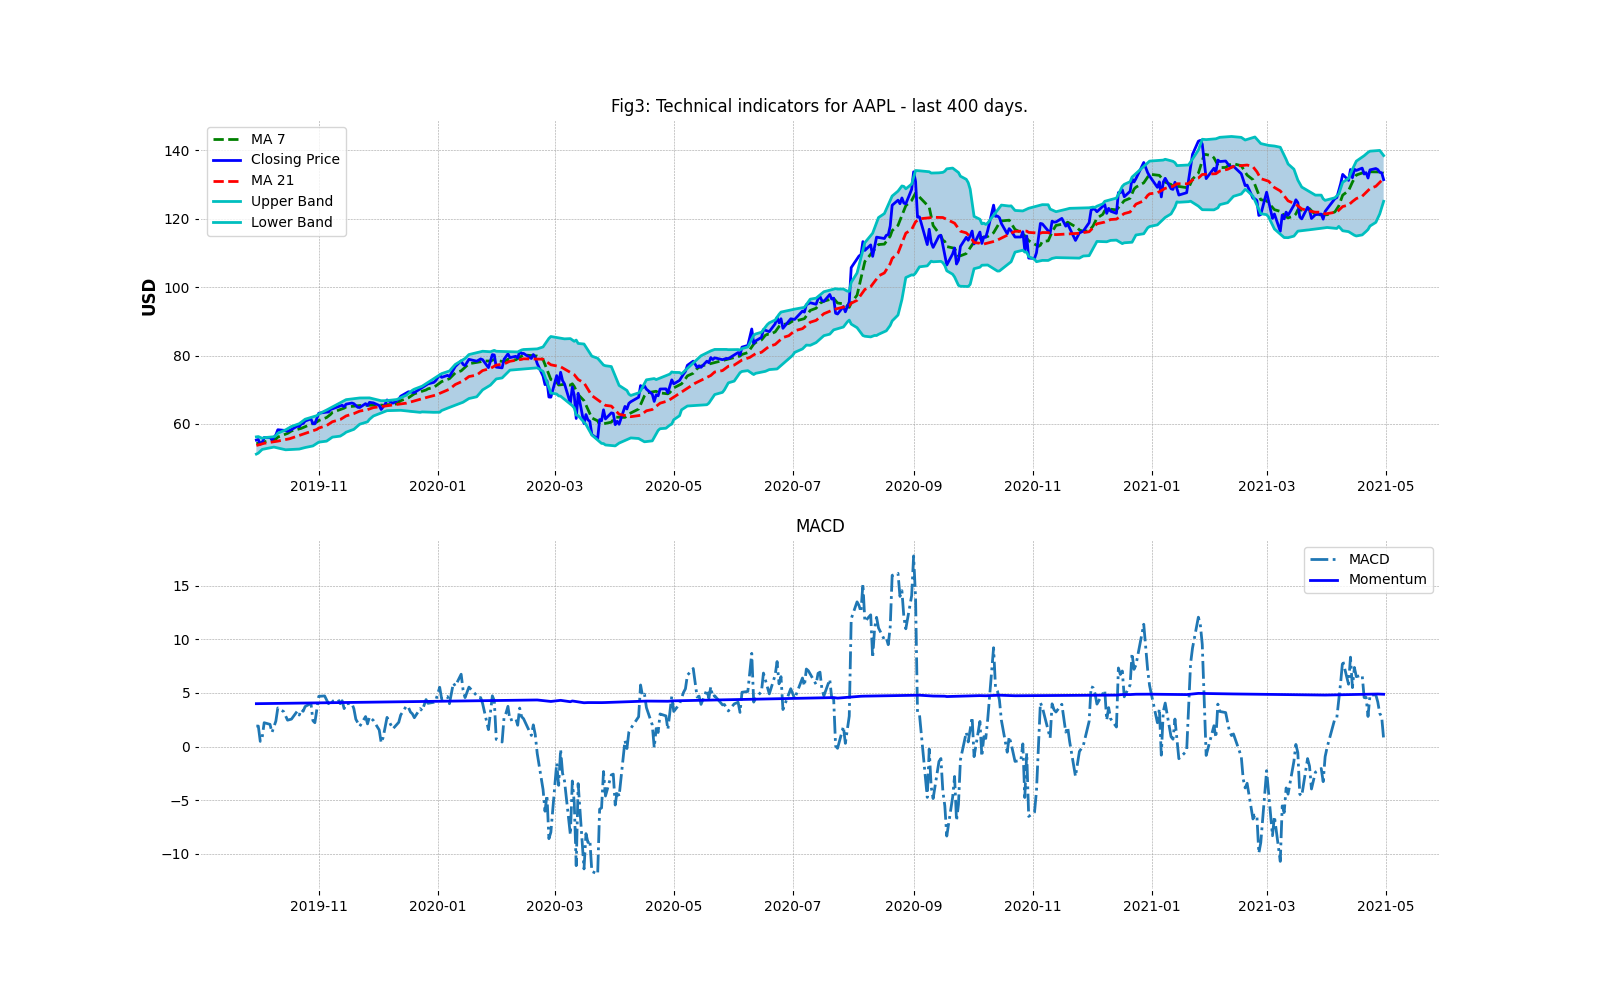

0


In [12]:
plot_technical_indicators(dataset_TI_df, 400)

In [13]:
df.dropna(axis=0, how='any')

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ma7,ma21,26ema,12ema,MACD,21sd,upper_band,lower_band,ema,momentum,log-momentum
Date,,,,,,,,,,,,,,,,,,
2000-03-01,0.911834,1.015658,0.911353,1.002200,1077003200,0.0,0.0,0.894135,0.865420,0.867638,0.890818,0.134562,0.050964,0.967348,0.763493,0.960451,0.002200,-6.119511
2000-03-21,0.942597,1.051709,0.935387,1.037770,524328000,0.0,0.0,0.940811,0.929739,0.922335,0.947774,0.115435,0.048375,1.026489,0.832988,1.007415,0.037770,-3.276242
2000-03-22,1.021187,1.110352,1.011814,1.108909,567996800,0.0,0.0,0.965944,0.940863,0.936344,0.972566,0.172565,0.060557,1.061977,0.819749,1.075078,0.108909,-2.217241
2000-03-23,1.092086,1.156496,1.076704,1.086799,562564800,0.0,0.0,0.995677,0.950042,0.947629,0.990142,0.139170,0.067335,1.084711,0.815372,1.082892,0.086799,-2.444164
2000-03-24,1.095450,1.106987,1.042096,1.066610,446913600,0.0,0.0,1.020328,0.958642,0.956545,1.001907,0.110065,0.070219,1.099079,0.818205,1.072037,0.066610,-2.708899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,134.830002,135.059998,133.559998,134.720001,66905100,0.0,0.0,133.798573,129.514763,129.906590,132.486304,4.813411,5.275836,140.066435,118.963090,134.381224,133.720001,4.895748
2021-04-27,135.009995,135.410004,134.110001,134.389999,66015800,0.0,0.0,133.831430,130.142382,130.238695,132.779180,4.151305,5.016053,140.174487,120.110276,134.387074,133.389999,4.893277
2021-04-28,134.309998,135.020004,133.080002,133.580002,107760100,0.0,0.0,133.651430,130.722858,130.486199,132.902384,3.093803,4.644097,140.011052,121.434664,133.849026,132.580002,4.887186


In [14]:
#add vix data
#df_vix = pd.read_csv("./data/vix-daily.csv", header=0, index_col="Date", parse_dates=True)
#df_vix.index.names = ['date']
#dataset_TI_df = pd.merge(dataset_TI_df, df_vix, on=["date"])
dataset_TI_df = add_stock_data("^VIX", dataset_TI_df)

/home/eshahrivar/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [15]:
#add similar company data
#df_AAPL = pd.read_csv("./data/AAPL_daily.csv", header=0, index_col="date", parse_dates=True)
#df_AAPL_close = df_AAPL[['4. close']]
#df_AAPL_close.rename(columns={"4. close": "AAPL_close"}, inplace = True)
#dataset_TI_df = pd.merge(dataset_TI_df, df_AAPL_close, on=["date"])
#dataset_TI_df

In [16]:
#add other faang data
for s in {"FB", "AAPL", "AMZN", "NVDA", "GOOG", "MSFT"}:
    if s != SYMBOL:
        dataset_TI_df = add_stock_data(s, dataset_TI_df)

/home/eshahrivar/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/home/eshahrivar/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/home/eshahrivar/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().ren

In [17]:
dataset_TI_df
#because of nvda, dataset will be only from 2012, but I guess that will be fine

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ma7,ma21,26ema,...,lower_band,ema,momentum,log-momentum,^VIX_close,FB_close,MSFT_close,GOOG_close,NVDA_close,AMZN_close
Date,,,,,,,,,,,,,,,,,,,,,
2012-05-18,16.426198,16.716908,16.063811,16.316067,732292400,0.0,0.0,16.942492,17.559597,17.535811,...,16.244833,16.379166,15.316067,2.728902,25.100000,38.230000,24.149399,299.078979,11.106503,213.850006
2012-05-21,16.442814,17.274645,16.428970,17.266645,631106000,0.0,0.0,16.901885,17.542457,17.515872,...,16.221989,16.970819,16.266645,2.789117,22.010000,34.029999,24.545424,305.908386,11.299586,218.110001
2012-05-22,17.521054,17.654259,16.999008,17.134058,694870400,0.0,0.0,16.859081,17.520880,17.487590,...,16.188724,17.079645,16.134058,2.780932,22.480000,31.000000,24.553673,299.278229,11.161671,215.330002
2012-05-23,17.150360,17.621035,17.019003,17.552126,584897600,0.0,0.0,16.913311,17.535939,17.492370,...,16.210180,17.394632,16.552126,2.806515,22.330000,32.000000,24.017391,303.592072,11.437493,217.279999
2012-05-24,17.715475,17.734857,17.265105,17.390926,496230000,0.0,0.0,16.966706,17.470487,17.484856,...,16.269851,17.392162,16.390926,2.796728,21.540001,33.029999,23.984381,300.702881,11.134089,215.240005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,134.830002,135.059998,133.559998,134.720001,66905100,0.0,0.0,133.798573,129.514763,129.906590,...,118.963090,134.381224,133.720001,4.895748,17.639999,303.040009,261.549988,2326.739990,619.119995,3409.000000
2021-04-27,135.009995,135.410004,134.110001,134.389999,66015800,0.0,0.0,133.831430,130.142382,130.238695,...,120.110276,134.387074,133.389999,4.893277,17.559999,303.570007,261.970001,2307.120117,615.270020,3417.429932
2021-04-28,134.309998,135.020004,133.080002,133.580002,107760100,0.0,0.0,133.651430,130.722858,130.486199,...,121.434664,133.849026,132.580002,4.887186,17.280001,307.100006,254.559998,2379.909912,611.070007,3458.500000


In [18]:
# add indices data
for s in {"^GSPC", "^IXIC", "^DJI", "^RUT", "NDX", "^TNX", "^FTSE", "^N225", "^BSESN", "HSI"}:
    if s != SYMBOL:
        dataset_TI_df = add_stock_data(s, dataset_TI_df)

/home/eshahrivar/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/home/eshahrivar/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/home/eshahrivar/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().ren

In [19]:
# add indices data
for s in {"GBPUSD=X", "GBPUSD=X", "EURUSD=X", "BTC-USD", "GC=F"}:
    dataset_TI_df = add_stock_data(s, dataset_TI_df)

/home/eshahrivar/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/home/eshahrivar/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/home/eshahrivar/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().ren

In [20]:
dataset_TI_df.drop(["Dividends", "Stock Splits"], axis=1)

,Open,High,Low,Close,Volume,ma7,ma21,26ema,12ema,MACD,...,^RUT_close,^DJI_close,^FTSE_close,^IXIC_close,^BSESN_close,HSI_close,BTC-USD_close,GC=F_close,EURUSD=X_close,GBPUSD=X_close
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,22.929142,23.049144,22.775179,22.999332,243706000,22.840523,22.815725,22.583917,22.799371,0.415415,...,1153.890015,17156.849609,6780.899902,4562.189941,26631.289062,24376.400391,457.334015,1234.400024,1.295908,1.626598
2014-09-18,23.078586,23.173681,22.994812,23.046888,149197600,22.963435,22.829310,22.618211,22.837450,0.428677,...,1159.270020,17265.990234,6819.299805,4593.430176,27112.210938,24168.699219,424.440002,1225.699951,1.285000,1.626810
2014-09-19,23.160095,23.173679,22.754810,22.858961,283609600,22.962141,22.833515,22.636044,22.840760,0.222917,...,1146.920044,17279.740234,6837.899902,4579.790039,27090.419922,24306.199219,394.795990,1215.300049,1.292006,1.643709
2014-09-22,23.049149,23.126129,22.772921,22.881599,211153600,22.950173,22.838690,22.654234,22.847043,0.227366,...,1129.359985,17172.679688,6773.600098,4527.689941,27206.740234,23955.500000,402.152008,1216.800049,1.284142,1.631987
2014-09-24,23.130662,23.286888,22.913301,23.037830,240687200,22.985752,22.855186,22.722779,22.927463,0.315051,...,1128.310059,17210.060547,6706.299805,4555.220215,26744.689453,23921.599609,423.204987,1218.599976,1.285397,1.639371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-15,133.820007,135.000000,133.639999,134.500000,89347100,131.922857,125.481428,127.127864,129.532226,7.372136,...,2257.070068,34035.988281,6983.500000,14038.759766,48803.679688,28793.099609,63314.011719,1765.400024,1.198610,1.377923
2021-04-16,134.300003,134.669998,133.279999,134.160004,84922400,132.817143,125.929047,127.648763,130.244192,6.511241,...,2262.669922,34200.671875,7019.500000,14052.339844,48832.031250,28969.699219,61572.789062,1779.000000,1.197175,1.378550
2021-04-19,133.509995,135.470001,133.339996,134.839996,94264200,133.457142,126.610476,128.181447,130.951239,6.658550,...,2232.000000,34077.628906,7000.100098,13914.769531,47949.421875,29106.199219,55724.265625,1769.400024,1.196945,1.381845


In [21]:
data_FT = dataset_TI_df[['Close']]
data_FT.reset_index(drop=True, inplace=True)
data_FT

,Close
0,22.999332
1,23.046888
2,22.858961
3,22.881599
4,23.037830
...,...
1279,134.500000
1280,134.160004
1281,134.839996
1282,133.110001


                            fft
0        62099.369968+0.000000j
1    12328.904118+14876.613051j
2     7306.565231+10793.319063j
3       983.678097+9894.618203j
4     -1773.869710+7295.738866j
..                          ...
638       -48.531714+11.475226j
639        -49.968615+3.111927j
640        -48.430439-4.621915j
641        -53.284963+2.878413j
642        -61.312515+0.000000j

[643 rows x 1 columns]


<IPython.core.display.Javascript object>


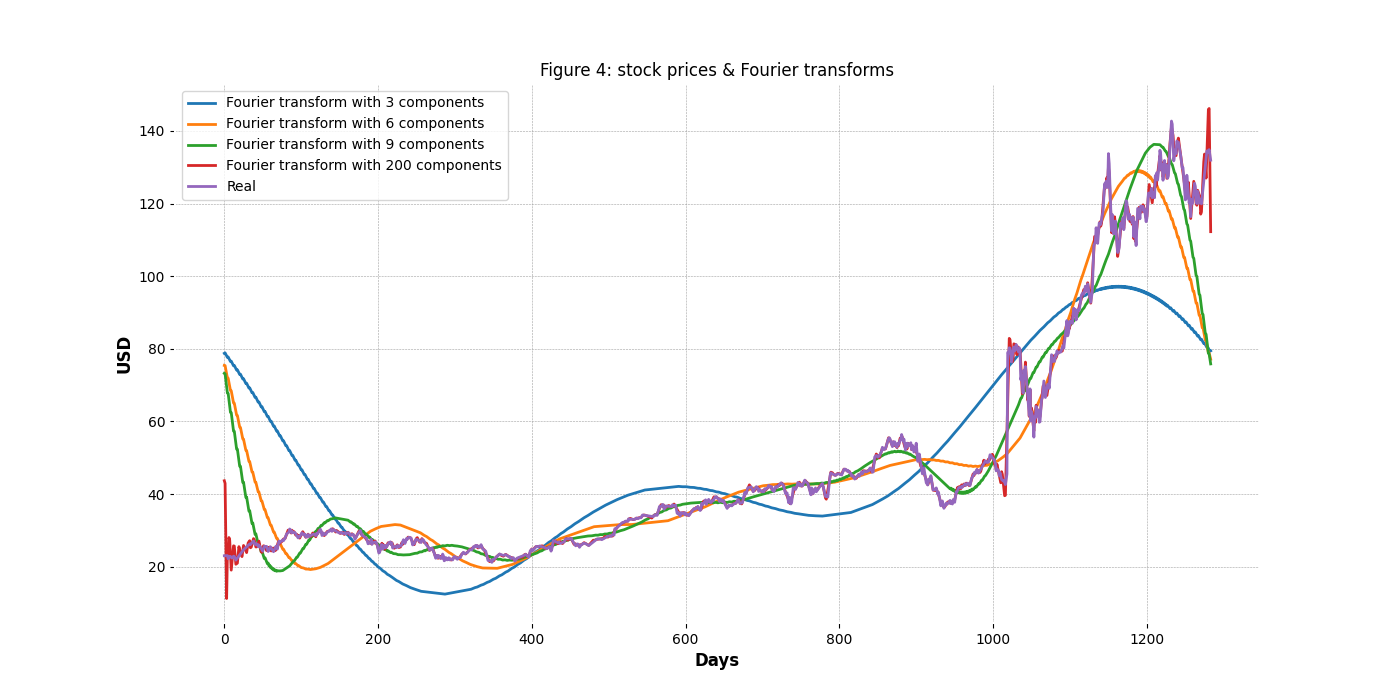

In [22]:
#fourier transfomr extraction

close_fft = np.fft.rfft(np.asarray(data_FT['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
print(fft_df)

plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 200]:
    fft_list_m10= np.copy(fft_list); 
    fft_list_m10[num_:-num_]=0
    dataset_TI_df['fft'+str(num_)] = (np.fft.irfft(fft_list_m10)).tolist()
    plt.plot(np.fft.irfft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_FT['Close'],  label='Real')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 4: stock prices & Fourier transforms')
plt.legend()
plt.show()

In [23]:
dataset_TI_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ma7,ma21,26ema,...,^BSESN_close,HSI_close,BTC-USD_close,GC=F_close,EURUSD=X_close,GBPUSD=X_close,fft3,fft6,fft9,fft200
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,22.929142,23.049144,22.775179,22.999332,243706000,0.0,0.0,22.840523,22.815725,22.583917,...,26631.289062,24376.400391,457.334015,1234.400024,1.295908,1.626598,78.742652,75.431204,73.247081,43.658645
2014-09-18,23.078586,23.173681,22.994812,23.046888,149197600,0.0,0.0,22.963435,22.829310,22.618211,...,27112.210938,24168.699219,424.440002,1225.699951,1.285000,1.626810,78.876367,75.371878,73.104624,42.945336
2014-09-19,23.160095,23.173679,22.754810,22.858961,283609600,0.0,0.0,22.962141,22.833515,22.636044,...,27090.419922,24306.199219,394.795990,1215.300049,1.292006,1.643709,78.183639,73.691587,70.517837,11.405081
2014-09-22,23.049149,23.126129,22.772921,22.881599,211153600,0.0,0.0,22.950173,22.838690,22.654234,...,27206.740234,23955.500000,402.152008,1216.800049,1.284142,1.631987,78.314448,73.629029,70.393468,11.224374
2014-09-24,23.130662,23.286888,22.913301,23.037830,240687200,0.0,0.0,22.985752,22.855186,22.722779,...,26744.689453,23921.599609,423.204987,1218.599976,1.285397,1.639371,77.618611,71.955418,67.809376,23.374184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-15,133.820007,135.000000,133.639999,134.500000,89347100,0.0,0.0,131.922857,125.481428,127.127864,...,48803.679688,28793.099609,63314.011719,1765.400024,1.198610,1.377923,80.524560,80.603788,81.300474,133.365850
2021-04-16,134.300003,134.669998,133.279999,134.160004,84922400,0.0,0.0,132.817143,125.929047,127.648763,...,48832.031250,28969.699219,61572.789062,1779.000000,1.197175,1.378550,79.842044,78.913164,78.741798,145.856638
2021-04-19,133.509995,135.470001,133.339996,134.839996,94264200,0.0,0.0,133.457142,126.610476,128.181447,...,47949.421875,29106.199219,55724.265625,1769.400024,1.196945,1.381845,79.981570,78.861181,78.564640,146.167684


<IPython.core.display.Javascript object>


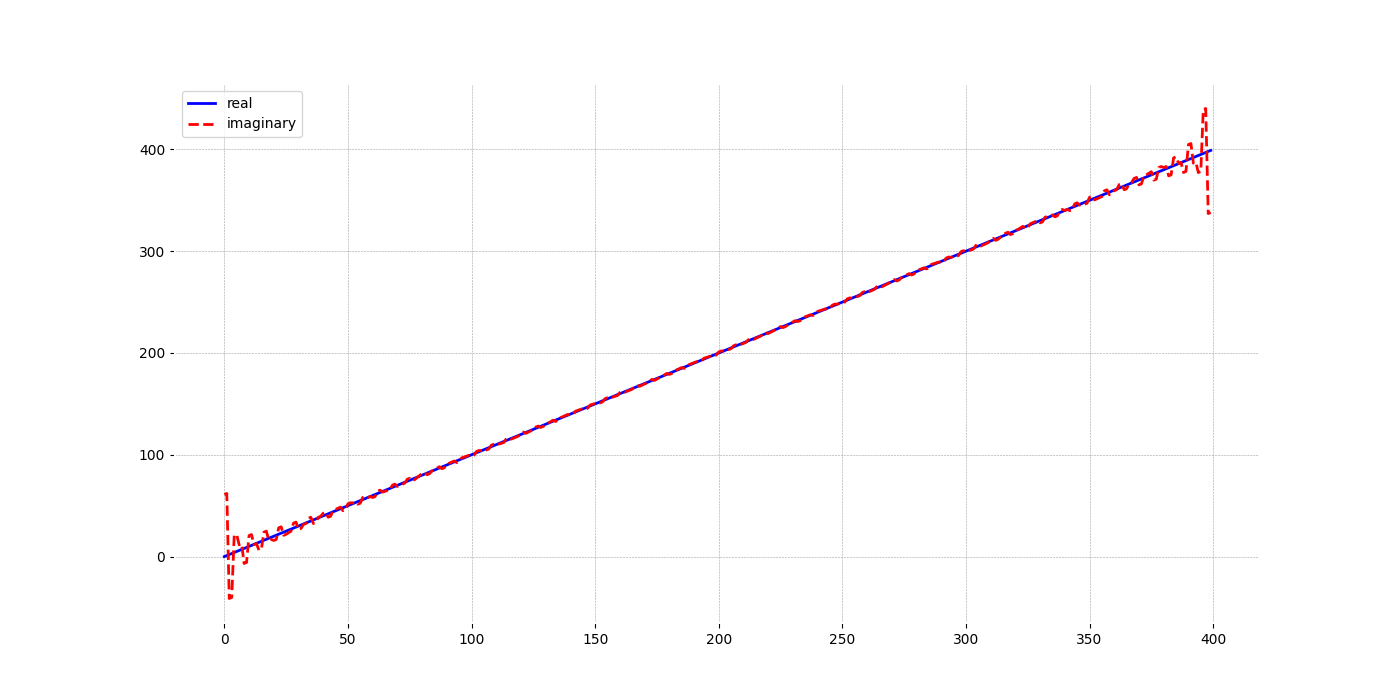

[ 61.          62.         -41.17434132 -40.17434132  20.73384279
  21.73384279  11.53057674  12.53057674  -6.77261535  -5.77261535
  20.63979412  21.63979412  11.82159119  12.82159119   6.32139632
   7.32139632  23.99620535  24.99620535  15.80287648  16.80287648
  15.80287648  16.80287648  28.24936371  29.24936371  20.89617199
  21.89617199  23.97843221  24.97843221  32.85566631  33.85566631
  26.52506677  27.52506677  31.48557761  32.48557761  37.64684241
  38.64684241  32.48169242  33.48169242  38.5656236   39.5656236
  42.5656236   43.5656236   38.66416254  39.66416254  45.32945075
  46.32945075  47.59598429  48.59598429  45.00879813  46.00879813
  51.83722526  52.83722526  52.73867609  53.73867609  51.4677695
  52.4677695   58.12799945  59.12799945  58.00075165  59.00075165
  58.00075165  59.00075165  64.23225658  65.23225658  63.39035981
  64.39035981  64.5717757   65.5717757   70.17759086  71.17759086
  68.91388748  69.91388748  71.1482562   72.1482562   75.99123606
  76.9912360

In [29]:
t = np.arange(400)
f = np.fft.rfft(t)
f[70:-70] = 0
s = np.fft.irfft(f)
plt.figure(figsize=(14, 7), dpi=100)
plt.plot(t, 'b-', s, 'r--')
plt.legend(('real', 'imaginary'))
plt.show()
print(s)

In [32]:
from statsmodels.tsa.arima_model import ARIMA
series = data_FT['Close']
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1283
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2471.706
Method:                       css-mle   S.D. of innovations              1.661
Date:                Sun, 02 May 2021   AIC                           4957.412
Time:                        20:04:10   BIC                           4993.511
Sample:                             1   HQIC                          4970.965
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0852      0.040      2.123      0.034       0.007       0.164
ar.L1.D.Close    -0.0547      0.028     -1.960      0.050      -0.109   -6.61e-06
ar.L2.D.Close     0.0444      0.028     

<ipython-input-32-a3a78b1cbd35>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
/home/eshahrivar/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [33]:
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

/home/eshahrivar/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/eshahrivar/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge

In [34]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 7.891


<IPython.core.display.Javascript object>


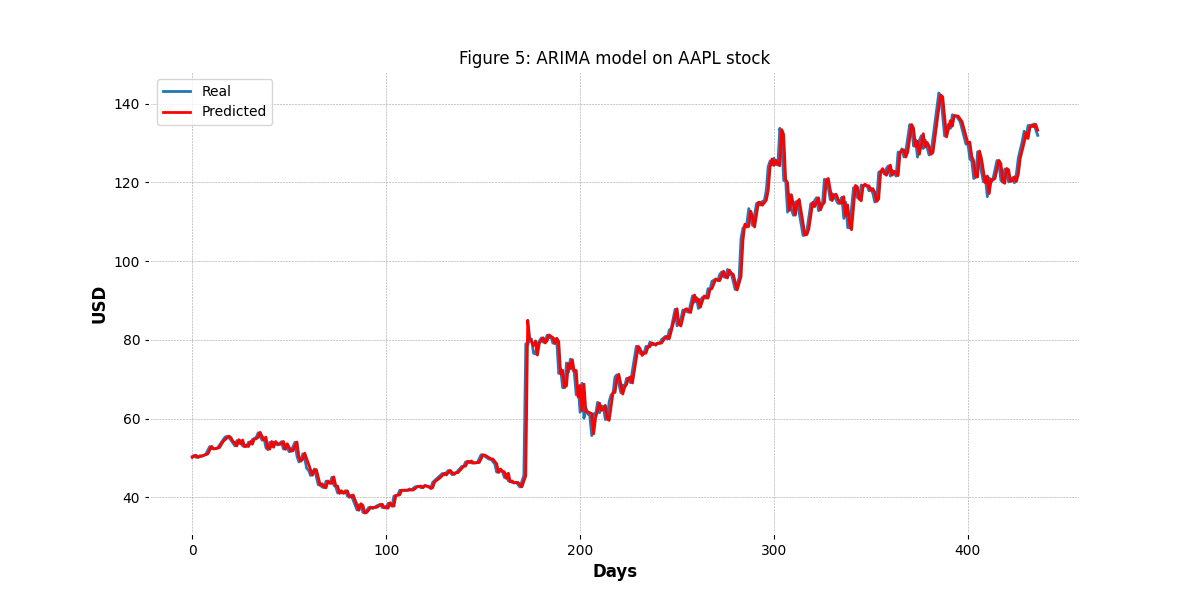

In [36]:
# Plot the predicted (from ARIMA) and real prices

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 5: ARIMA model on '+SYMBOL+' stock')
plt.legend()
plt.show()